In [1]:
#suppress deprecation warnings  
import warnings
warnings.simplefilter(action='ignore', category=DeprecationWarning)

import pandas as pd 
import matplotlib.pyplot as plt 
import hddm 
from patsy import dmatrix 
import numpy as np
import seaborn as sns
import jupyterthemes as jt 
from collections import OrderedDict
from operator import itemgetter    

# print(hddm.__version__)

%matplotlib inline
plt.rcParams['figure.figsize'] = 30, 10
from sys import platform

/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


In [2]:
if platform == 'linux':
    home = '/home/krista/'
elif platform == 'darwin': 
    home = '/Users/67981492/'

In [3]:
!pwd
load_dir = home+'Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/hddm_reg_models/'
# load_dir = '/Users/67981492/Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/hddm_reg_models/'
fig_dir = home+'Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/figures/'
print(load_dir)

/home/krista/Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/analysis_nbs
/home/krista/Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/hddm_reg_models/


In [4]:
v_cpp_subj_obs_reg=hddm.load(load_dir+'v_cpp_subj_obs_reg')
tr_cpp_subj_obs_reg=hddm.load(load_dir+'tr_cpp_subj_obs_reg')
a_cpp_subj_obs_reg=hddm.load(load_dir+'a_cpp_subj_obs_reg')

v_B_subj_obs_reg=hddm.load(load_dir+'v_B_subj_obs_reg')
tr_B_subj_obs_reg=hddm.load(load_dir+'tr_B_subj_obs_reg')
a_B_subj_obs_reg=hddm.load(load_dir+'a_B_subj_obs_reg')

In [5]:
one_ls_one_lt_dics = [v_cpp_subj_obs_reg.dic,
tr_cpp_subj_obs_reg.dic, 
a_cpp_subj_obs_reg.dic, 
v_B_subj_obs_reg.dic, 
tr_B_subj_obs_reg.dic,
a_B_subj_obs_reg.dic]

one_ls_one_lt_names = ['v_cpp', 'tr_cpp', 'a_cpp', 'v_B', 'tr_B', 'a_B']

In [6]:
v_cpp_B_subj_obs_reg=hddm.load(load_dir+'v_cpp_B_subj_obs_reg')
tr_cpp_B_subj_obs_reg=hddm.load(load_dir+'tr_cpp_B_subj_obs_reg')
a_cpp_B_subj_obs_reg=hddm.load(load_dir+'a_cpp_B_subj_obs_reg')

In [7]:
two_ls_one_lt_dics = [v_cpp_B_subj_obs_reg.dic, tr_cpp_B_subj_obs_reg.dic,
                    a_cpp_B_subj_obs_reg.dic]

two_ls_one_lt_names = ['v_cpp_B', 'tr_cpp_B', 'a_cpp_B']

In [8]:
v_a_B_subj_obs_reg=hddm.load(load_dir+'v_a_B_subj_obs_reg')
v_t_B_subj_obs_reg=hddm.load(load_dir+'v_t_B_subj_obs_reg')
v_a_cpp_subj_obs_reg=hddm.load(load_dir+'v_a_cpp_subj_obs_reg')

v_t_cpp_subj_obs_reg=hddm.load(load_dir+'v_t_cpp_subj_obs_reg')
a_t_B_subj_obs_reg=hddm.load(load_dir+'a_t_B_subj_obs_reg')
a_t_cpp_subj_obs_reg=hddm.load(load_dir+'a_t_cpp_subj_obs_reg')

In [9]:
one_ls_two_lt_dics = [v_a_B_subj_obs_reg.dic,v_t_B_subj_obs_reg.dic, 
                     v_a_cpp_subj_obs_reg.dic, v_t_cpp_subj_obs_reg.dic,
                     a_t_B_subj_obs_reg.dic,a_t_cpp_subj_obs_reg.dic]

one_ls_two_lt_names = ['v_a_B', 'v_t_B', 'v_a_cpp', 'v_t_cpp', 
                      'a_t_B', 'a_t_cpp']

In [10]:
v_B_a_cpp_subj_obs_reg=hddm.load(load_dir+'v_B_a_cpp_subj_obs_reg')
a_B_t_cpp_subj_obs_reg=hddm.load(load_dir+'a_B_t_cpp_subj_obs_reg')
a_cpp_t_B_subj_obs_reg=hddm.load(load_dir+'a_cpp_t_B_subj_obs_reg')
t_cpp_v_B_subj_obs_reg=hddm.load(load_dir+'t_cpp_v_B_subj_obs_reg')
v_cpp_a_B_subj_obs_reg=hddm.load(load_dir+'v_cpp_a_B_subj_obs_reg')
v_cpp_t_B_subj_obs_reg=hddm.load(load_dir+'v_cpp_t_B_subj_obs_reg')

In [11]:
two_ls_two_lt_dics = [v_B_a_cpp_subj_obs_reg.dic, a_B_t_cpp_subj_obs_reg.dic,
                     a_cpp_t_B_subj_obs_reg.dic, t_cpp_v_B_subj_obs_reg.dic, 
                     v_cpp_a_B_subj_obs_reg.dic, v_cpp_t_B_subj_obs_reg.dic]
two_ls_two_lt_names = ['v_B_a_cpp', 'a_B_t_cpp', 'a_cpp_t_B', 
                       't_cpp_v_B', 'v_cpp_a_B', 'v_cpp_t_B']

In [12]:
v_a_t_B_subj_obs_reg=hddm.load(load_dir+'v_a_t_B_subj_obs_reg')
v_a_B_t_cpp_subj_obs_reg=hddm.load(load_dir+'v_a_B_t_cpp_subj_obs_reg')

v_t_B_a_cpp_subj_obs_reg=hddm.load(load_dir+'v_t_B_a_cpp_subj_obs_reg')
v_B_a_t_cpp_subj_obs_reg=hddm.load(load_dir+'v_B_a_t_cpp_subj_obs_reg')

v_cpp_a_t_B_subj_obs_reg=hddm.load(load_dir+'v_cpp_a_t_B_subj_obs_reg')
a_t_B_v_cpp_subj_obs_reg=hddm.load(load_dir+'a_t_B_v_cpp_subj_obs_reg')

v_t_cpp_a_B_subj_obs_reg=hddm.load(load_dir+'v_t_cpp_a_B_subj_obs_reg')
v_a_cpp_t_B_subj_obs_reg=hddm.load(load_dir+'v_a_cpp_t_B_subj_obs_reg')

v_a_t_cpp_subj_obs_reg=hddm.load(load_dir+'v_a_t_cpp_subj_obs_reg')

In [13]:
two_ls_three_lt_dics = [ v_a_B_t_cpp_subj_obs_reg.dic, 
                       v_t_B_a_cpp_subj_obs_reg.dic, v_B_a_t_cpp_subj_obs_reg.dic,
                       v_cpp_a_t_B_subj_obs_reg.dic, a_t_B_v_cpp_subj_obs_reg.dic,
                       v_t_cpp_a_B_subj_obs_reg.dic, v_a_cpp_t_B_subj_obs_reg.dic
                       ]

two_ls_three_lt_names = ['v_a_t_B', 'v_a_B_t_cpp', 
                        'v_a_B_t_cpp','v_B_a_t_cpp',
                        'v_cpp_a_t_B', 'a_t_B_v_cpp', 
                        'v_t_cpp_a_B', 'v_a_cpp_t_B', 
                        'v_a_t_cpp']

In [14]:
one_ls_three_lt_dics = [v_a_t_cpp_subj_obs_reg.dic, v_a_t_B_subj_obs_reg.dic]
one_ls_three_lt_names = ['v_a_t_cpp', 'v_a_t_B']

In [15]:
all_dics = (one_ls_one_lt_dics + one_ls_two_lt_dics+ one_ls_three_lt_dics+
two_ls_one_lt_dics+ two_ls_two_lt_dics+ two_ls_three_lt_dics)
all_names = (one_ls_one_lt_names+ one_ls_two_lt_names+ one_ls_three_lt_names+
            two_ls_one_lt_names+ two_ls_two_lt_names+ two_ls_three_lt_names)

dics_dict = dict(zip(all_names,all_dics))
sorted_dics = list(sorted(dics_dict.items(), key=itemgetter(1)))
all_dics_df = pd.DataFrame(OrderedDict(sorted_dics),index=[0])

In [16]:
all_dics_df.v_a_t_B - all_dics_df.v_a_B_t_cpp

0   -30.695349
dtype: float64

In [17]:
winning_model, worst_model = min(dics_dict, key=dics_dict.get), max(dics_dict, key=dics_dict.get)

In [18]:
winning_model, worst_model

('v_a_t_B', 'a_B')

In [19]:
all_dics_diff=all_dics_df.diff(axis=1)

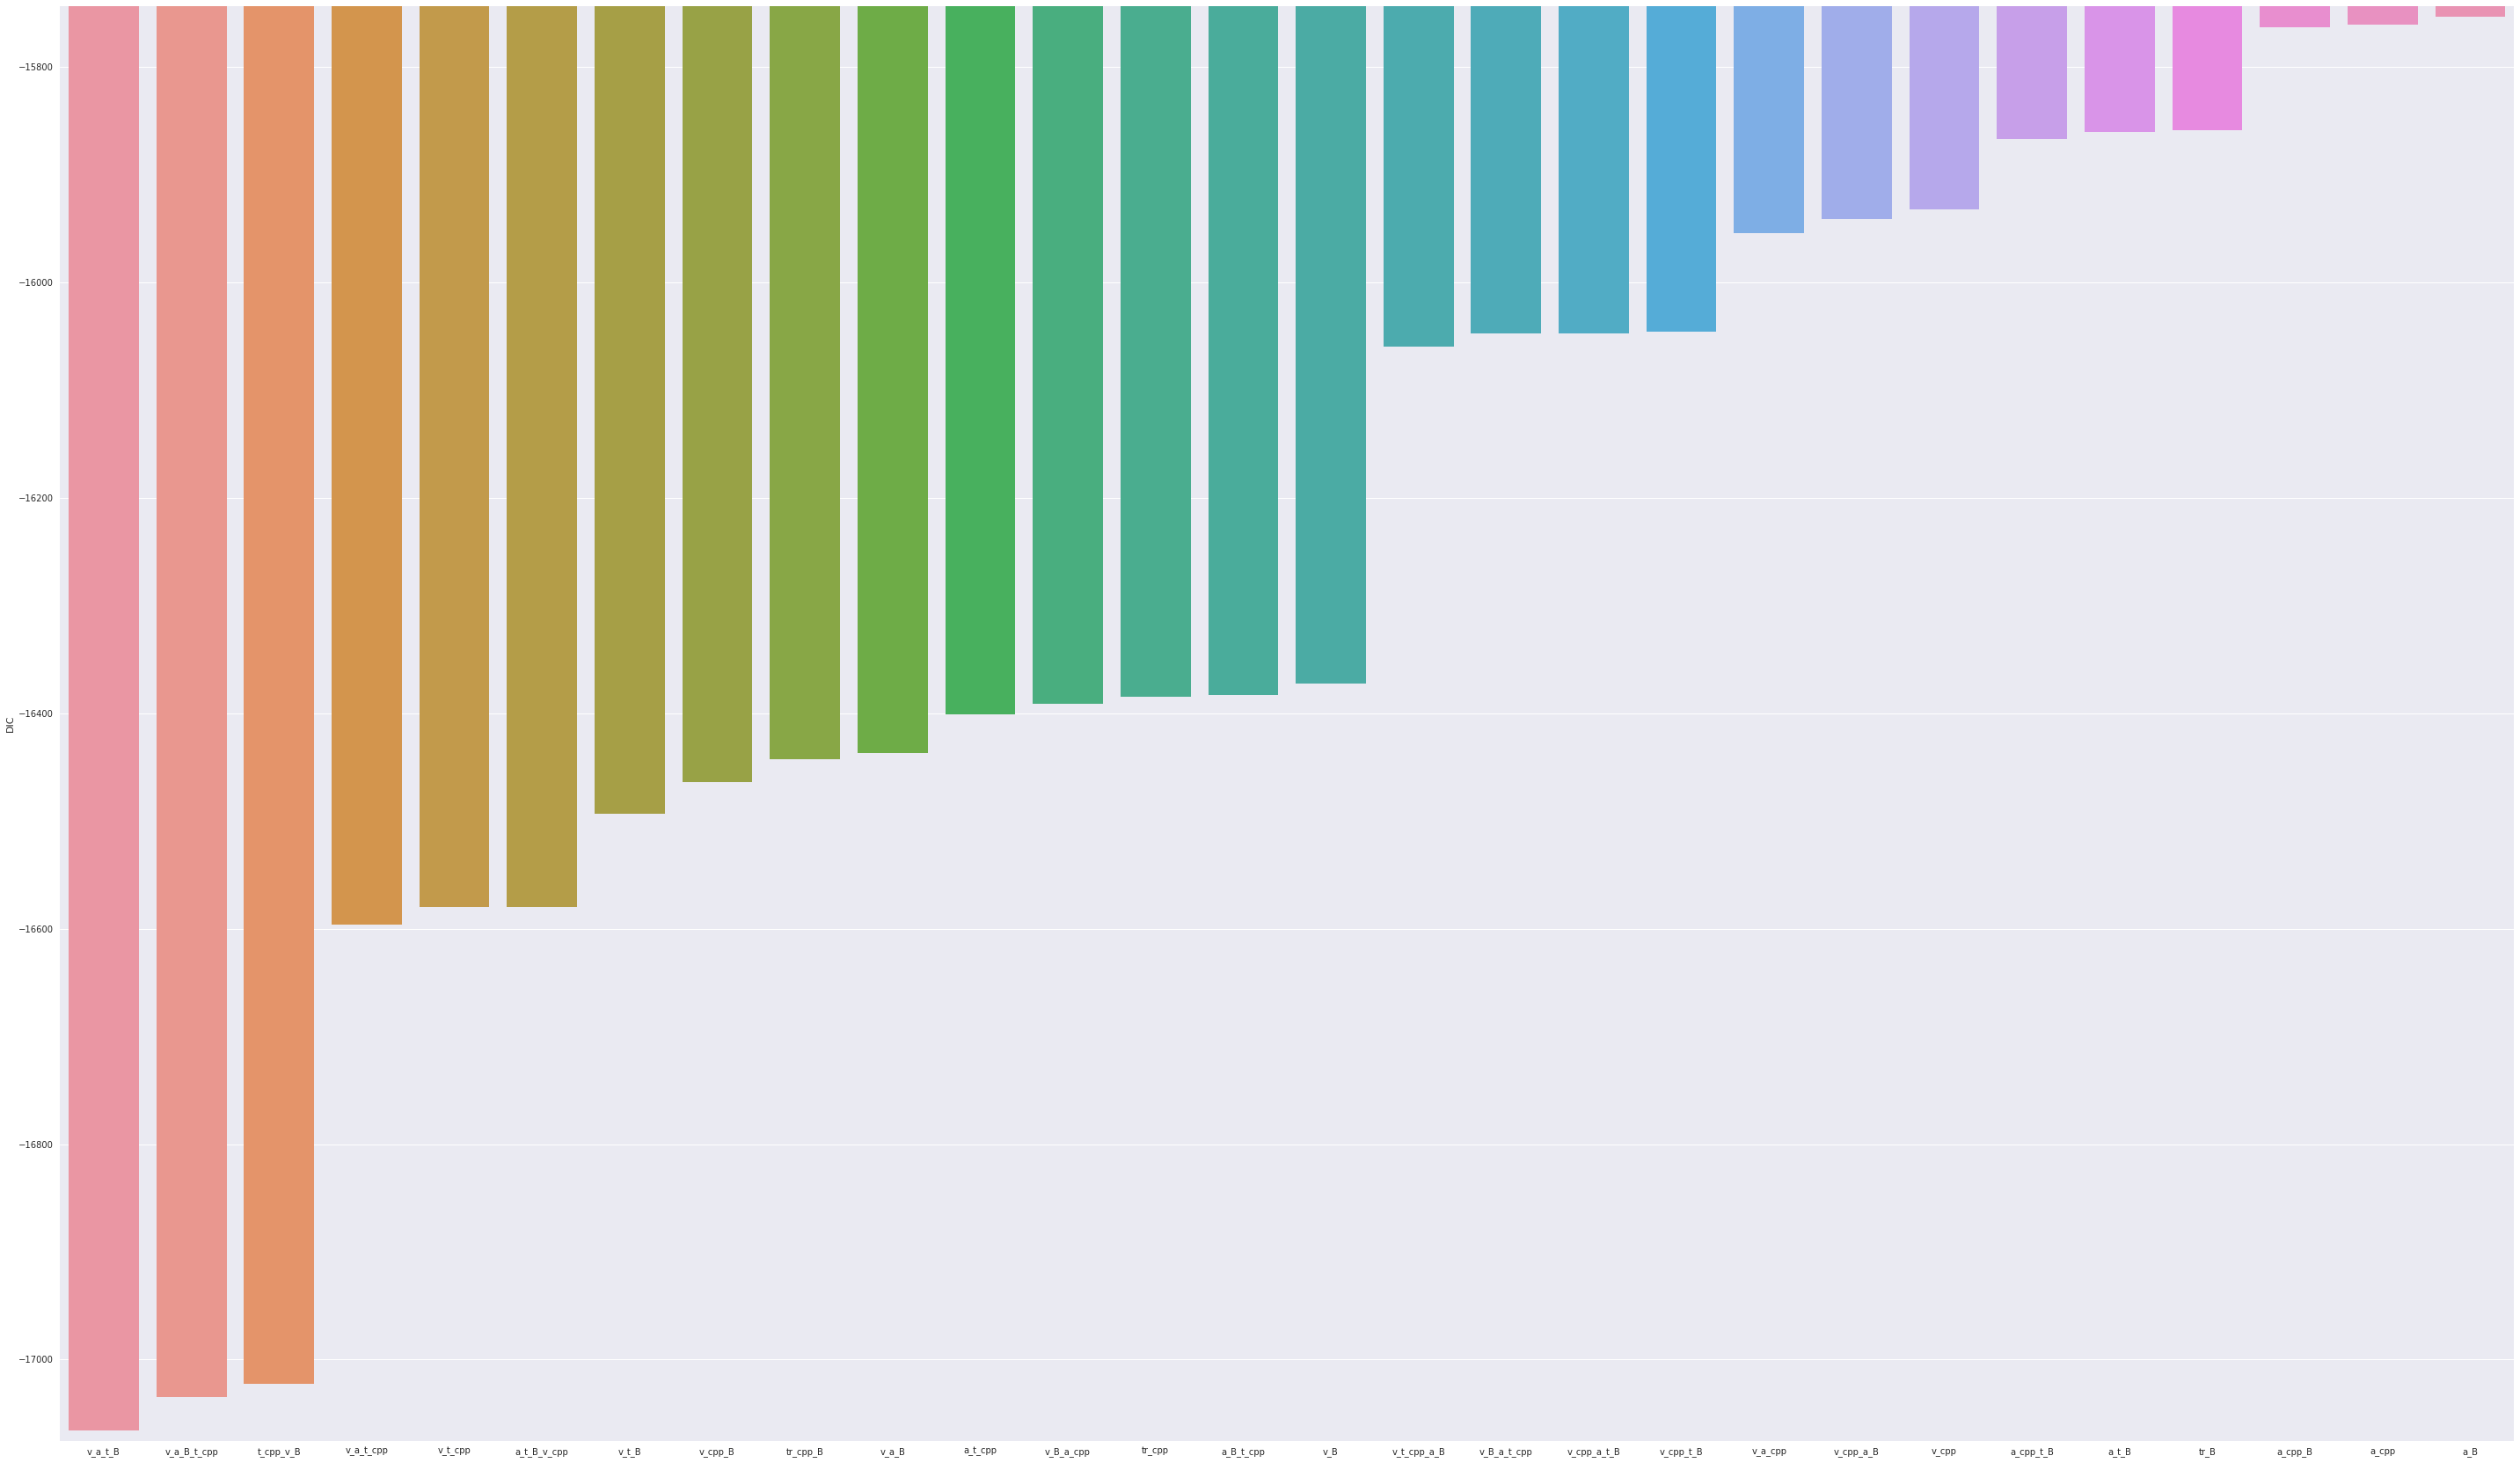

In [20]:
sns.set(font_scale=1)  
plt.figure(figsize=(50,30))
ax=sns.barplot(data=all_dics_df)
ax.set(ylabel='DIC')
plt.ylim([min(all_dics)-10, max(all_dics) + 10])
plt.savefig(fig_dir+'all_obs_reg_models_dics.pdf')

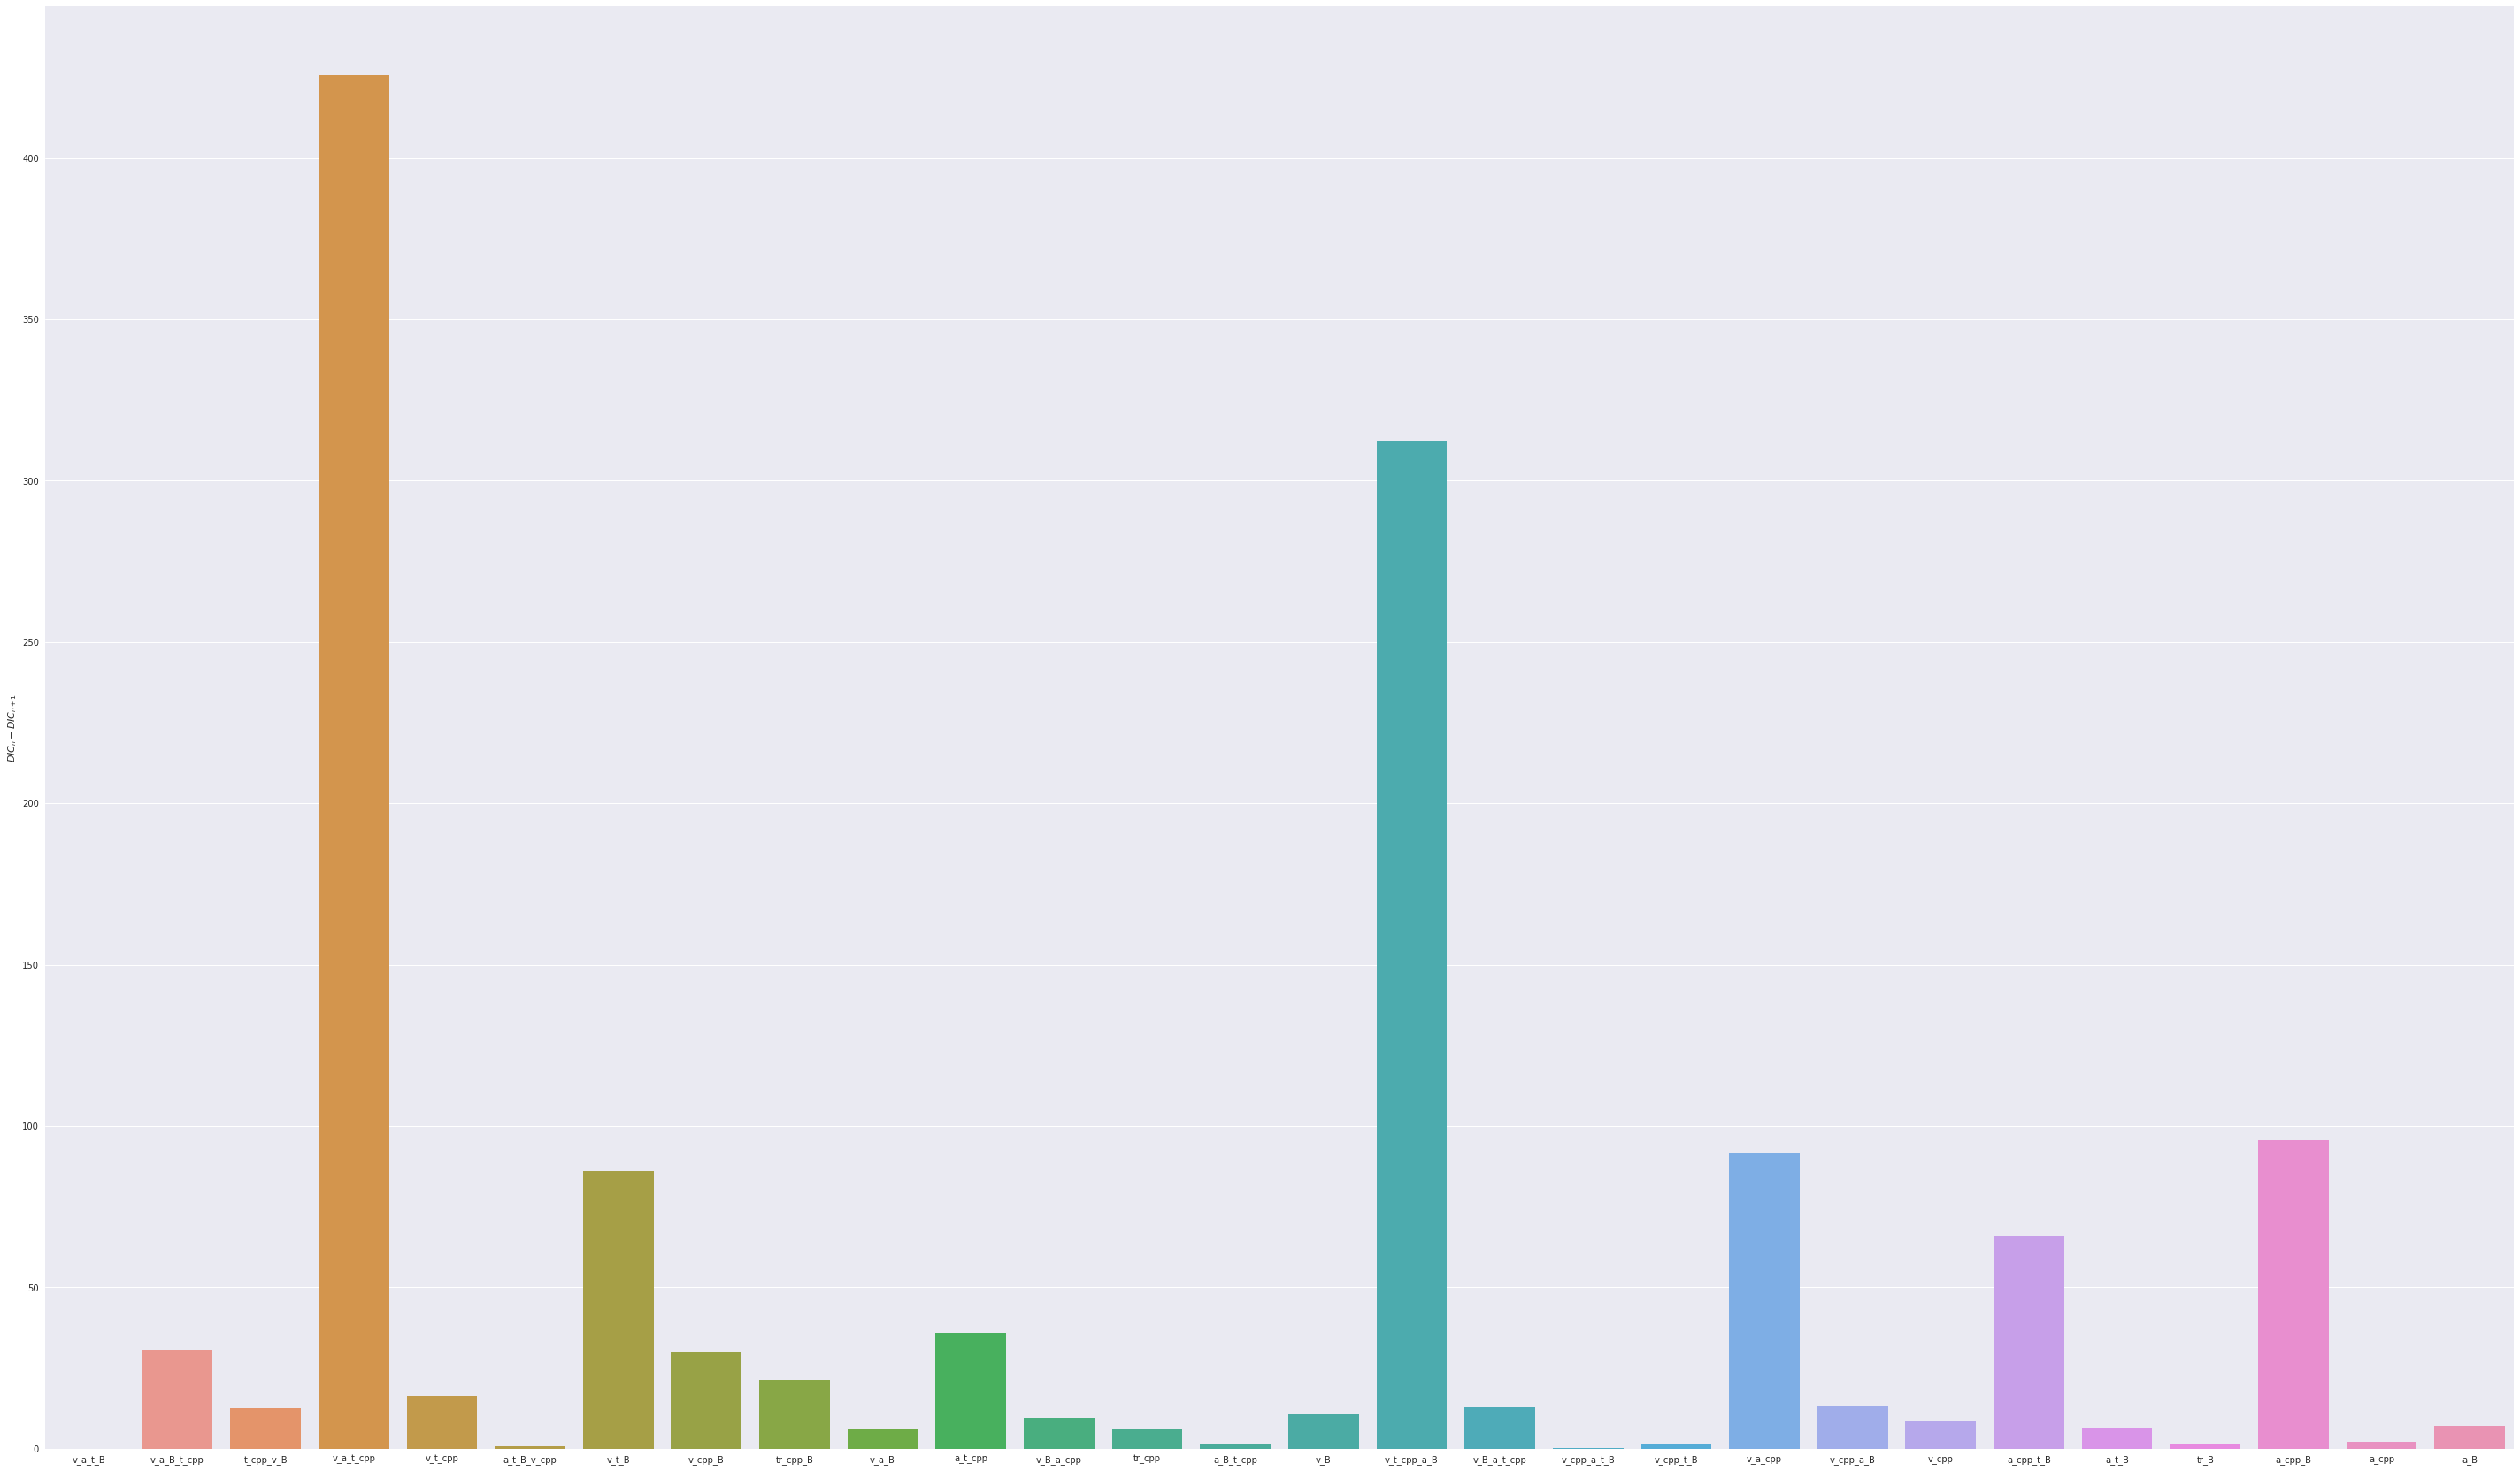

In [21]:
sns.set(font_scale=1)  
plt.figure(figsize=(50,30))
ax=sns.barplot(data=all_dics_diff)
ax.set(ylabel='$DIC_n - DIC_{n+1}$')
# plt.ylim([min(all_di)])
plt.savefig(fig_dir+'all_obs_reg_models_dic_diffs.pdf')

In [22]:
#extract estimates of best model and find rts using these estimates 
# v_a_t_B_subj_obs_reg.nodes_db

In [23]:
 v_a_t_B_subj_obs_reg.nodes_db.ix['a_Intercept', 'node'].trace().mean()
 v_a_t_B_subj_obs_reg.nodes_db.ix['v_Intercept', 'node'].trace().mean()
 v_a_t_B_subj_obs_reg.nodes_db.ix['t_Intercept', 'node'].trace().mean()

0.11600327648508876

In [24]:
aRegressors = ['a_Intercept', "a_B:C(condition)[hc]", 
               "a_B:C(condition)[lc]", "a_B:C(condition)[hv]","a_B:C(condition)[lv]"]
vRegressors = ['v_Intercept', "v_B:C(condition)[hc]", "v_B:C(condition)[lc]",
               "v_B:C(condition)[hv]", "v_B:C(condition)[lv]"]
tRegressors = ['t_Intercept', "t_B:C(condition)[hc]", "t_B:C(condition)[lc]",
               "t_B:C(condition)[hv]", "t_B:C(condition)[lv]"]

regressors = [aRegressors, vRegressors,tRegressors]
pdists = []; lvls = ['hc', 'lc', 'hv', 'lv']; params = ['a', 'v','t']
for param, paramRegs in zip(params, regressors):
    traces = v_a_t_B_subj_obs_reg.nodes_db.ix[paramRegs, 'node']
    c0 = traces[0].trace().mean()
    condTraces = traces[1:]
    pdist = pd.DataFrame({lvl:cTrace.trace() for (lvl, cTrace) in zip(lvls, condTraces)})
    pdistTidy = pd.melt(pdist, var_name='level')
    pdistTidy['param'] = param
    pdists.append(pdistTidy)
pdists = pd.concat(pdists)
vdists = pdists[pdists.param=='v']
adists = pdists[pdists.param=='a']
tdists = pdists[pdists.param=='t']

In [25]:
# v_a_t_B_subj_obs_reg.print_stats()

In [26]:
v0 = v_a_t_B_subj_obs_reg.nodes_db.ix[['v_Intercept'], 'mean'][0]
v_beta_hc = v_a_t_B_subj_obs_reg.nodes_db.ix[['v_B:C(condition)[hc]'], 'mean'][0]
v_beta_lc = v_a_t_B_subj_obs_reg.nodes_db.ix[['v_B:C(condition)[lc]'], 'mean'][0]
v_beta_hv = v_a_t_B_subj_obs_reg.nodes_db.ix[['v_B:C(condition)[hv]'], 'mean'][0]
v_beta_lv = v_a_t_B_subj_obs_reg.nodes_db.ix[['v_B:C(condition)[lv]'], 'mean'][0]

In [27]:
t0 = v_a_t_B_subj_obs_reg.nodes_db.ix[['t_Intercept'], 'mean'][0]
t_beta_hc = v_a_t_B_subj_obs_reg.nodes_db.ix[['t_B:C(condition)[hc]'], 'mean'][0]
t_beta_lc = v_a_t_B_subj_obs_reg.nodes_db.ix[['t_B:C(condition)[lc]'], 'mean'][0]
t_beta_hv = v_a_t_B_subj_obs_reg.nodes_db.ix[['t_B:C(condition)[hv]'], 'mean'][0]
t_beta_lv = v_a_t_B_subj_obs_reg.nodes_db.ix[['t_B:C(condition)[lv]'], 'mean'][0]

In [28]:
a0 = v_a_t_B_subj_obs_reg.nodes_db.ix[['a_Intercept'], 'mean'][0]
a_beta_hc = v_a_t_B_subj_obs_reg.nodes_db.ix[['a_B:C(condition)[hc]'], 'mean'][0]
a_beta_lc = v_a_t_B_subj_obs_reg.nodes_db.ix[['a_B:C(condition)[lc]'], 'mean'][0]
a_beta_hv = v_a_t_B_subj_obs_reg.nodes_db.ix[['a_B:C(condition)[hv]'], 'mean'][0]
a_beta_lv = v_a_t_B_subj_obs_reg.nodes_db.ix[['a_B:C(condition)[lv]'], 'mean'][0]

In [29]:
print(a0, a_beta_hc, a_beta_lc, a_beta_hv, a_beta_lv)

1.02049506276 0.0086281813141 0.0211973053369 0.00205023136044 0.0123031410113


In [30]:
print(v0, v_beta_hc, v_beta_lc, v_beta_hv, v_beta_lv)

0.665208082078 0.0575993499528 0.272933495066 0.0216070628318 0.254012412963


In [31]:
v0, a0, t0

(0.66520808207763238, 1.0204950627608562, 0.11600327648508876)

In [32]:
vdists.value = vdists.value + v0
adists.value = adists.value + a0
tdists.value = tdists.value + t0

/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [33]:
all_data = hddm.load_csv(home+'Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/aggregated_data/combined_learning_sig_obs_data.csv')  
data = all_data[['p_id_accuracy', 'rt', 'condition', 'ID', 'choice_B', 'cpp']] 
data = data.rename(index=str, columns={"p_id_accuracy": "response", "ID": "subj_idx"})
data.columns = data.columns.str.strip()
data = hddm.utils.flip_errors(data)
data.head()

,response,rt,condition,subj_idx,choice_B,cpp
0,1.0,0.711570,hc,761,0.000000,0.099471
1,0.0,-0.681410,hc,761,0.000000,0.035079
2,1.0,0.767118,hc,761,1.241007,0.023075
3,0.0,-0.507209,hc,761,0.595781,0.019881
4,1.0,0.656259,hc,761,0.306135,0.018539


In [34]:
#given these estimates, find rts and accuracies
v_hc = v0 + v_beta_hc
v_lc = v0 + v_beta_lc
v_hv = v0 + v_beta_hv
v_lv = v0 + v_beta_lv

print(v_hc, v_lc, v_hv, v_lv)


a_hc = a0 + a_beta_hc
a_lc = a0 + a_beta_lc
a_hv = a0 + a_beta_hv
a_lv = a0 + a_beta_lv

print(a_hc, a_lc, a_hv, a_lv)

t_hc = t0 + t_beta_hc
t_lc = t0 + t_beta_lc
t_hv = t0 + t_beta_hv
t_lv = t0 + t_beta_lv

print(t_hc, t_lc, t_hv, t_lv)

0.72280743203 0.938141577143 0.686815144909 0.919220495041
1.02912324407 1.0416923681 1.02254529412 1.03279820377
0.112666883481 0.116212935093 0.117285943311 0.115642880351


## Parameter distributions as a function of volatility and conflict  

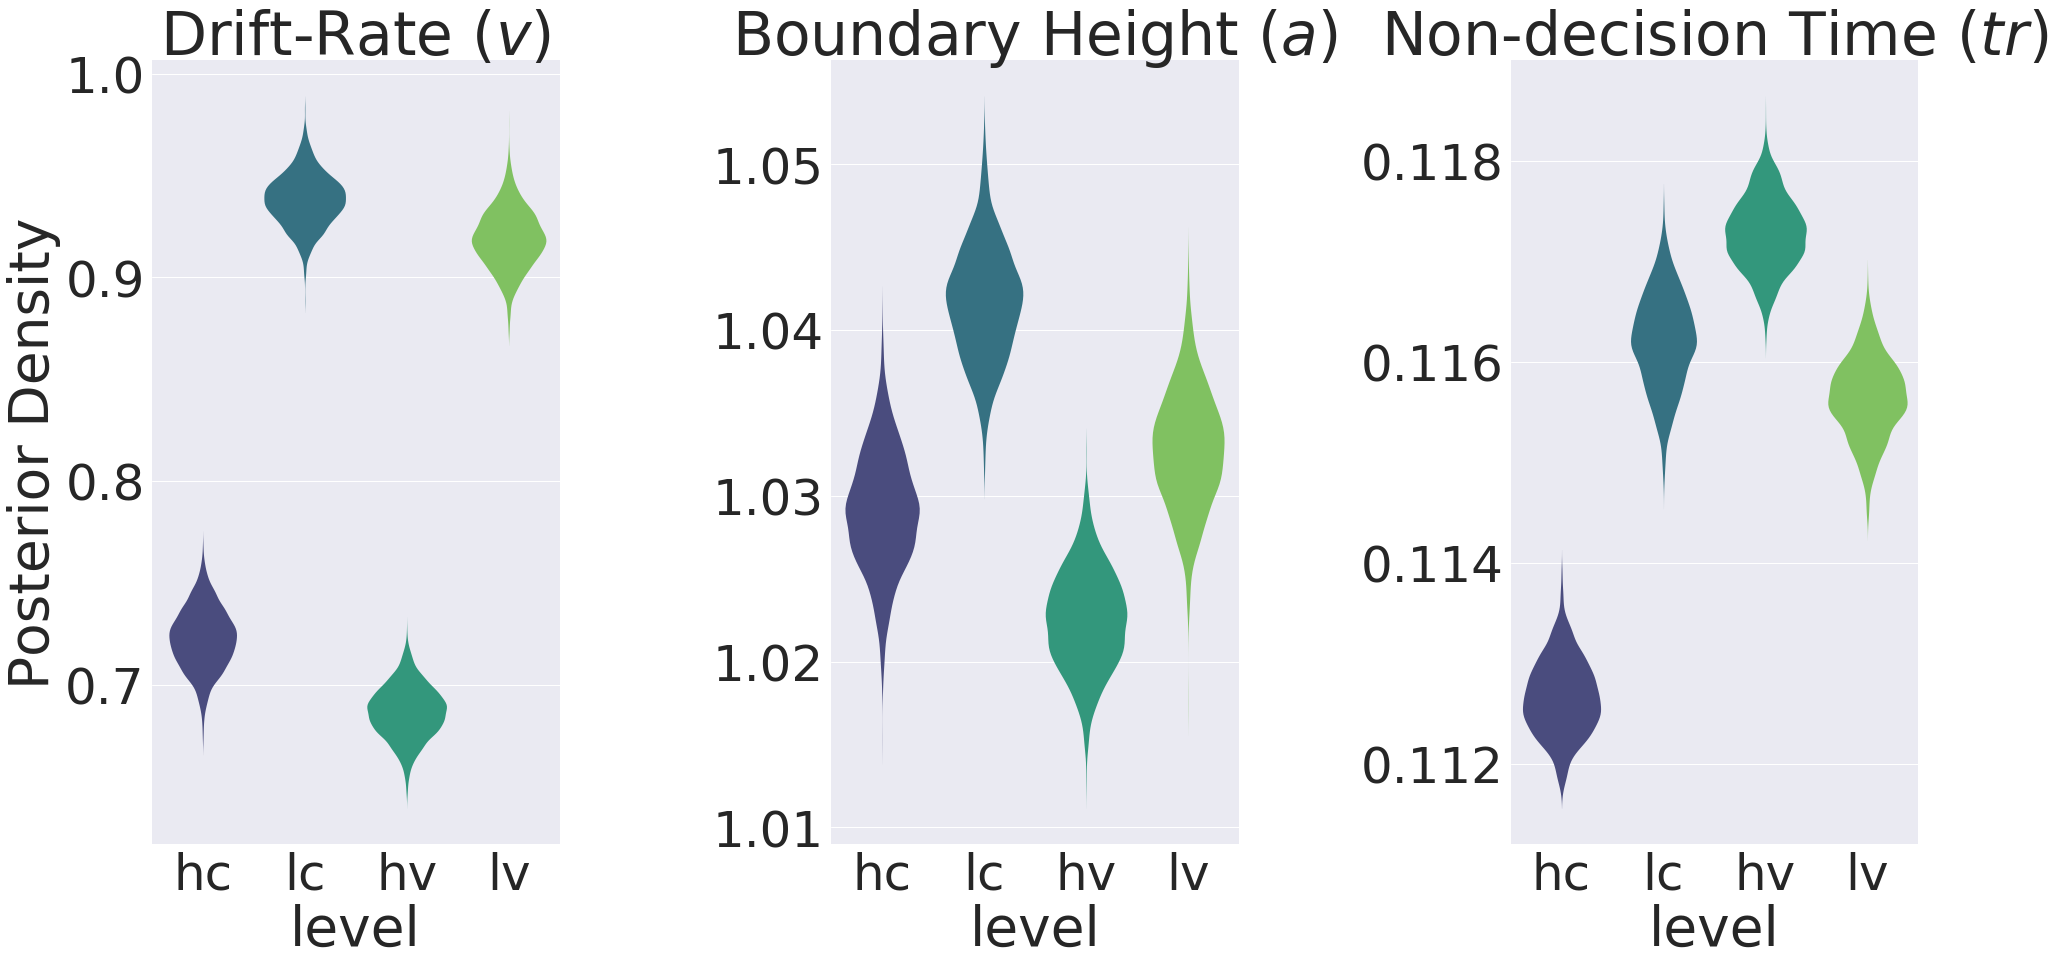

In [35]:
sns.set(font_scale=5)  

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30, 15))
                             
sns.violinplot(x='level', y='value', data=vdists, palette='viridis', order=lvls, ax=ax1, linewidth=0)
sns.violinplot(x='level', y='value', data=adists, palette='viridis', order=lvls, ax=ax2, linewidth=0)
sns.violinplot(x='level', y='value', data=tdists, palette='viridis', order=lvls, ax=ax3, linewidth=0)

ax1.set_ylabel('Posterior Density')
ax2.set_ylabel('')
ax3.set_ylabel('')

ax1.set_title('Drift-Rate ($v$)')
ax2.set_title('Boundary Height ($a$)')
ax3.set_title('Non-decision Time ($tr$)')

plt.tight_layout()
sns.despine()

* The DIC analysis above indicates that belief is the learning signal which covaries with all considered parameters. Belief in the value difference between chosen and unchosen targets is most responsible for changes in drift-rate, boundary height, and non-decision time.   
* Because belief is the most informative learning signal, parameters are most sensitive to changes under the least ambiguous conditions (i.e., low volatility & low conflict conditions). 
* The drift-rate decreases under high conflict and high volatility conditions.
* The boundary height increases under conditions of low conflict. 
* Non-decision time decreases in the high conflict condition. This is a bit puzzling. Possible that non-decision processes (motor execution processes, perceptual processing) are refined if the high-conflict decision process is relatively constant (on average / across epochs). 

## Traditional distributions of within-subjects effects for winning model

In [57]:
v_a_t_B_subj_obs_reg.is_informative
v_a_t_B_subj_obs_reg.reg_outcomes
v_a_t_B_subj_obs_reg.model_descrs

[{'link_func': <function hddm.models.hddm_regression.HDDMRegressor.__setstate__.<locals>.<lambda>(x)>,
  'model': ' B:C(condition)',
  'outcome': 'v',
  'params': ['v_Intercept',
   'v_B:C(condition)[hc]',
   'v_B:C(condition)[hv]',
   'v_B:C(condition)[lc]',
   'v_B:C(condition)[lv]']},
 {'link_func': <function hddm.models.hddm_regression.HDDMRegressor.__setstate__.<locals>.<lambda>(x)>,
  'model': ' B:C(condition)',
  'outcome': 'a',
  'params': ['a_Intercept',
   'a_B:C(condition)[hc]',
   'a_B:C(condition)[hv]',
   'a_B:C(condition)[lc]',
   'a_B:C(condition)[lv]']},
 {'link_func': <function hddm.models.hddm_regression.HDDMRegressor.__setstate__.<locals>.<lambda>(x)>,
  'model': ' B:C(condition)',
  'outcome': 't',
  'params': ['t_Intercept',
   't_B:C(condition)[hc]',
   't_B:C(condition)[hv]',
   't_B:C(condition)[lc]',
   't_B:C(condition)[lv]']}]

P(HV > LV) =  0.0108


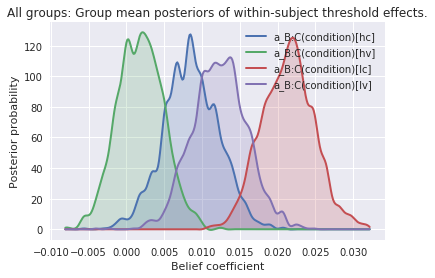

In [66]:
sns.set_style()
sns.set(font_scale=1)  

a_hc, a_hv, a_lc, a_lv = v_a_t_B_subj_obs_reg.nodes_db.ix[['a_B:C(condition)[hc]', 'a_B:C(condition)[hv]', 
                                                             'a_B:C(condition)[lc]', 'a_B:C(condition)[lv]'], 'node']


bound_fig=hddm.analyze.plot_posterior_nodes([a_hc, a_hv, a_lc, a_lv])
# bound_fig=hddm.analyze.plot_posterior_nodes([a_hv, a_lv])

plt.xlabel('Belief coefficient')
plt.ylabel('Posterior probability')
plt.legend()
plt.title('All groups: Group mean posteriors of within-subject threshold effects.')
# plt.savefig('hddm_demo_fig_07.pdf')
print("P(HV > LV) = ", (a_hv.trace() > a_lv.trace()).mean())

* Effect of trial-by-trial variations in belief are to increase bound in all conditions, except high volatility. 
* In high volatility conditions, trial-by-trial variations in belief have no effect on the boundary. 
    

In [61]:
print("P(a_theta) > 0 for high vol. condition ) = ", (a_hv.trace() > 0).mean())

P(a_theta) > 0 for high vol. condition ) =  0.7464


In [60]:
print("P(a_theta) < 0 for high conflict condition ) = ", (a_hc.trace() < 0).mean())
print("P(a_theta) < 0 for high vol. condition ) = ", (a_hv.trace() < 0).mean())
print("P(a_theta) < 0 for low conflict condition ) = ", (a_lc.trace() < 0).mean())
print("P(a_theta) < 0 for low vol condition ) = ", (a_lv.trace() < 0).mean())

P(a_theta) < 0 for high conflict condition ) =  0.01
P(a_theta) < 0 for high vol. condition ) =  0.2536
P(a_theta) < 0 for low conflict condition ) =  0.0
P(a_theta) < 0 for low vol condition ) =  0.0008


P(HC < LC) =  1.0


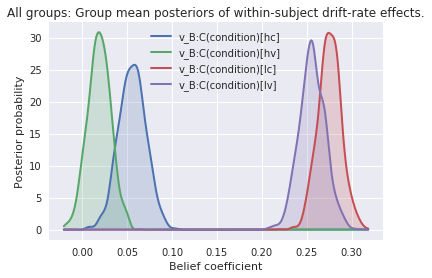

In [67]:
sns.set_style()
sns.set(font_scale=1)  

v_hc, v_hv, v_lc, v_lv = v_a_t_B_subj_obs_reg.nodes_db.ix[['v_B:C(condition)[hc]', 'v_B:C(condition)[hv]', 
                                                             'v_B:C(condition)[lc]', 'v_B:C(condition)[lv]'], 'node']


drift_fig=hddm.analyze.plot_posterior_nodes([v_hc, v_hv, v_lc, v_lv])
plt.xlabel('Belief coefficient')
plt.ylabel('Posterior probability')
plt.title('All groups: Group mean posteriors of within-subject drift-rate effects.')
plt.legend()
# plt.savefig('hddm_demo_fig_07.pdf')
print("P(HC < LC) = ", (v_hc.trace() < v_lc.trace()).mean())

In [65]:
print("P(v_t) < 0 for high conflict condition ) = ", (v_hc.trace() < 0).mean())
print("P(v_t) < 0 for high vol. condition ) = ", (v_hv.trace() < 0).mean())
print("P(v_t) < 0 for low conflict condition ) = ", (v_lc.trace() < 0).mean())
print("P(v_t) < 0 for low vol condition ) = ", (v_lv.trace() < 0).mean())

P(v_t) < 0 for high conflict condition ) =  0.0
P(v_t) < 0 for high vol. condition ) =  0.0472
P(v_t) < 0 for low conflict condition ) =  0.0
P(v_t) < 0 for low vol condition ) =  0.0


* For all conditions, trial-by-trial variations in belief increase the drift-rate, but more so for the lc and lv conditions than the hc and hv conditions.

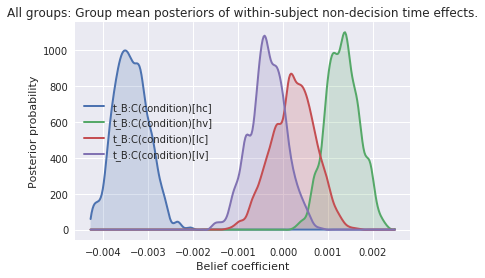

In [68]:
sns.set_style()
sns.set(font_scale=1)  

t_hc, t_hv, t_lc, t_lv = v_a_t_B_subj_obs_reg.nodes_db.ix[['t_B:C(condition)[hc]', 't_B:C(condition)[hv]', 
                                                             't_B:C(condition)[lc]', 't_B:C(condition)[lv]'], 'node']


ndt_fig=hddm.analyze.plot_posterior_nodes([t_hc, t_hv, t_lc, t_lv])
plt.xlabel('Belief coefficient')
plt.ylabel('Posterior probability')
plt.title('All groups: Group mean posteriors of within-subject non-decision time effects.')
plt.legend()
# plt.savefig('hddm_demo_fig_07.pdf')

In [63]:
print("P(a_t) > 0 for high conflict condition ) = ", (t_hc.trace() > 0).mean())
print("P(a_t) > 0 for high vol. condition ) = ", (t_hv.trace() > 0).mean())
print("P(a_t) > 0 for low conflict condition ) = ", (t_lc.trace() > 0).mean())
print("P(a_t) > 0 for low vol condition ) = ", (t_lv.trace() > 0).mean())

P(a_t) > 0 for high conflict condition ) =  0.0
P(a_t) > 0 for high vol. condition ) =  1.0
P(a_t) > 0 for low conflict condition ) =  0.684
P(a_t) > 0 for low vol condition ) =  0.174


In [64]:
print("P(a_t) < 0 for high conflict condition ) = ", (t_hc.trace() < 0).mean())
print("P(a_t) < 0 for high vol. condition ) = ", (t_hv.trace() < 0).mean())
print("P(a_t) < 0 for low conflict condition ) = ", (t_lc.trace() < 0).mean())
print("P(a_t) < 0 for low vol condition ) = ", (t_lv.trace() < 0).mean())

P(a_t) < 0 for high conflict condition ) =  1.0
P(a_t) < 0 for high vol. condition ) =  0.0
P(a_t) < 0 for low conflict condition ) =  0.316
P(a_t) < 0 for low vol condition ) =  0.826


* Effect of trial-by-trial variations in belief are to decrease non-decision time in high conflict condition. 
* In high volatility conditions, trial-by-trial variations in belief increase non-decision time. 

#### Hypothesized contrasts

In [39]:
# tst hyp. that bound ^ with vol
print("P(HV > LV) = ", (a_hv.trace() > a_lv.trace()).mean())
# tst hyp. that drift dec. with conf
print("P(HC < LC) = ", (v_hc.trace() < v_lc.trace()).mean())

P(HV > LV) =  0.0108
P(HC < LC) =  1.0


In [40]:
print("P(LV < LC) = ", (a_lv.trace() < a_lc.trace()).mean())
print("P(LV < HC) = ", (a_lv.trace() < a_hc.trace()).mean())

P(LV < LC) =  0.974
P(LV < HC) =  0.2144


In [41]:
print("P(HC > LV) = ", (v_hc.trace() > v_lv.trace()).mean())
print("P(HC > HV) = ", (v_hc.trace() > v_hv.trace()).mean())

P(HC > LV) =  0.0
P(HC > HV) =  0.9704


## Posterior predictive check 
### How well does the best regression model fit the data? 
#### While the best regression model loses the least information among considered models, can the best model replicate observed distributions? 

In [42]:
#simulate new rts and accuracies from the winning regression model 
ppc_data = hddm.utils.post_pred_gen(v_a_t_B_subj_obs_reg, append_data=True)

KeyboardInterrupt: 

In [ ]:
#format data for hddm
data = hddm.load_csv(home+'Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/aggregated_data/combined_learning_sig_obs_data.csv') 
data = all_data[['p_id_accuracy', 'rt', 'condition', 'ID', 'choice_B', 'cpp']] 
data = data.rename(index=str, columns={"p_id_accuracy": "response", "ID": "subj_idx", 
                                       "choice_B": "B"})

data.columns = data.columns.str.strip()
data = hddm.utils.flip_errors(data)

In [ ]:
#compare the rts and accuracies simulated from the model to the observed data
ppc_compare = hddm.utils.post_pred_stats(data, ppc_data)
print(ppc_compare)

## Predicted trial-by-trial variations of parameters (not formatted well atm)

In [ ]:
v_hc_trials = v0 + v_beta_hc * data[data.condition=='hc']['choice_B'] 
v_lc_trials = v0 + v_beta_lc * data[data.condition=='lc']['choice_B'] 
v_hv_trials = v0 + v_beta_hc * data[data.condition=='hv']['choice_B'] 
v_lv_trials = v0 + v_beta_lc * data[data.condition=='lv']['choice_B'] 


plt.plot(v_hc_trials[:50].values, label='hc')
plt.plot(v_lc_trials[:50].values, label='lc')
plt.plot(v_hv_trials[:50].values, label='hv')
plt.plot(v_lv_trials[:50].values, label='lv')

ax = plt.gca()
ax.set_ylabel('Drift-Rate')
ax.set_xlabel('Trials')
ax.legend()

In [ ]:
a_hc_trials = a0 + a_beta_hc * data[data.condition=='hc']['choice_B'] 
a_lc_trials = a0 + a_beta_lc * data[data.condition=='lc']['choice_B'] 
a_hv_trials = a0 + a_beta_hc * data[data.condition=='hv']['choice_B'] 
a_lv_trials = a0 + a_beta_lc * data[data.condition=='lv']['choice_B'] 


plt.plot(a_hc_trials[:50].values, label='hc')
plt.plot(a_lc_trials[:50].values, label='lc')
plt.plot(a_hv_trials[:50].values, label='hv')
plt.plot(a_lv_trials[:50].values, label='lv')

ax = plt.gca()
ax.set_ylabel('Threshold')
ax.set_xlabel('Trials')
ax.legend()

### Check convergence

In [ ]:
v_a_t_B_subj_obs_reg.plot_posteriors()